<a href="https://colab.research.google.com/github/Cristian-Rojas2/TalentoTech/blob/main/1_2_Dataset_An%C3%A1lisis_Texto_y_Lenguaje_Natural_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install googletrans==3.1.0a0

In [4]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [5]:
#Función para traducir los comentarios
def translateComment(strComment):
    translator = Translator()
    strEngComment = translator.translate(strComment, src='es', dest='en')
    return strEngComment.text
# Función para conocer la polaridad
def getPolarity(strComment):
    strComment = translateComment(strComment)
    analysis = TextBlob(strComment)
    return analysis.sentiment.polarity

#Cargamos el dataset
df = pd.read_csv('/content/Comentarios.csv')
df['polaridad'] = df['Comentario'].apply(getPolarity)

df.to_csv('/content/Comentarios_Polaridad.csv', index=False)

In [6]:
df = pd.read_csv('/content/Comentarios_Polaridad.csv')
display(df)

,Comentario,polaridad
0,La comida fue excelente y el servicio fue exce...,0.555556
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",0.200000
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833
68,"La comida está bien, pero el ambiente no es mu...",0.208974
69,No me gustó la comida y el servicio fue muy de...,-0.520000


In [8]:
df1 = pd.read_csv('/content/Comentarios_mod.csv', sep=';')
display(df1)

,Comentario
0,La comida fue excelente y el servicio fue exce...
1,El ambiente era agradable y la comida estaba d...
2,"La comida estaba bien, pero el servicio fue le..."
3,"No me gustó la comida, estaba fría y el sabor ..."
4,El peor restaurante en el que he estado. No lo...
...,...
66,Siempre disfruto venir aquí. La comida es deli...
67,"Buen lugar para cenar, aunque el servicio pued..."
68,"La comida está bien, pero el ambiente no es mu..."
69,No me gustó la comida y el servicio fue muy de...


In [9]:
#Cargamos el dataset
df = pd.read_csv('/content/Comentarios_mod.csv', sep=';')
df['polaridad'] = df['Comentario'].apply(getPolarity)

df.to_csv('/content/Comentarios_Polaridad_mod.csv', index=False)

In [10]:
df1 = pd.read_csv('/content/Comentarios_Polaridad_mod.csv')
display(df1)

,Comentario,polaridad
0,La comida fue excelente y el servicio fue exce...,0.555556
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",0.200000
3,"No me gustó la comida, estaba fría y el sabor ...",-0.237500
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833
68,"La comida está bien, pero el ambiente no es mu...",0.208974
69,No me gustó la comida y el servicio fue muy de...,-0.520000


In [11]:
positivos = df1[df1['polaridad'] > 0].shape[0]
negativos = df1[df1['polaridad'] < 0].shape[0]
neutros = df1[df1['polaridad'] == 0].shape[0]

print(f'Comentarios positivos: {positivos}')
print(f'Comentarios negativos: {negativos}')
print(f'Comentarios neutros: {neutros}')

Comentarios positivos: 43
Comentarios negativos: 28
Comentarios neutros: 0


In [12]:
# Funcion clasificar el sentimiento
def classifySentiment(polarity):
    if polarity > 0:
        return 'Positivo'
    elif polarity < 0:
        return 'Negativo'
    else:
        return 'Neutro'

df2 = pd.read_csv('/content/Comentarios_Polaridad_mod.csv', on_bad_lines='skip')

#Aplicamos la funcion de polaridad y clasificar el sentimiento
df2['polaridad'] = df2['Comentario'].apply(getPolarity) #Aplica funcion de polaridad
df2['sentimiento'] = df2['polaridad']

df3=pd.read_csv('/content/Comentarios_mod.csv', sep=';', on_bad_lines='skip')
df3['polaridad'] = df3['Comentario'].apply(getPolarity) #Aplica funcion de polaridad
df3['sentimiento'] = df3['polaridad'].apply(classifySentiment) #Aplica funcion de clasificacion de sentimiento

<ipython-input-13-fac9d6bdef18>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


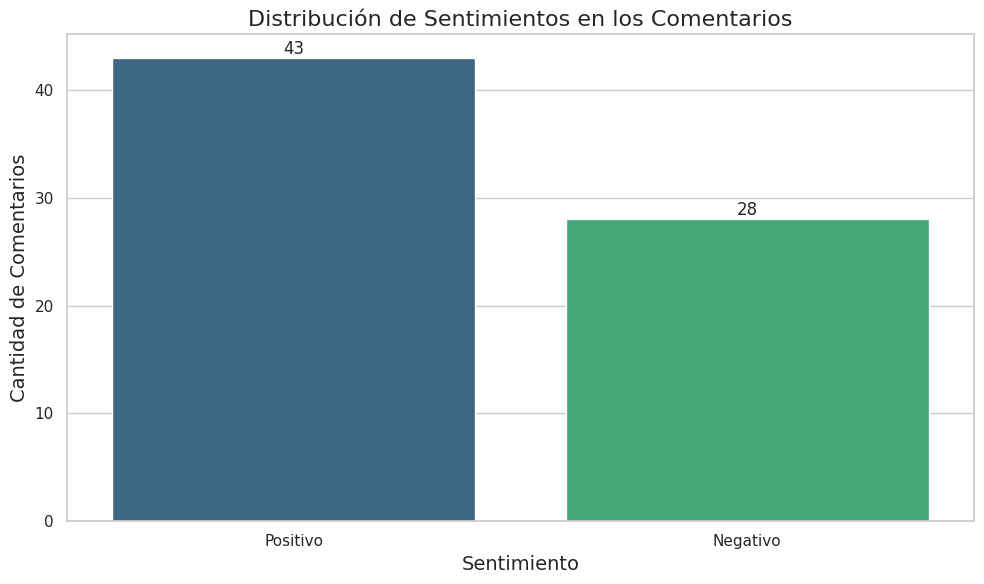

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
#Cuenta cantidad de comentarios en cada categoria de sentimiento
sentiment_counts = df3['sentimiento'].value_counts()

#Grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribución de Sentimientos en los Comentarios', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Cantidad de Comentarios', fontsize=14)
# Valores en las barras
for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
#Mostrar el grafico
plt.tight_layout()
plt.show()

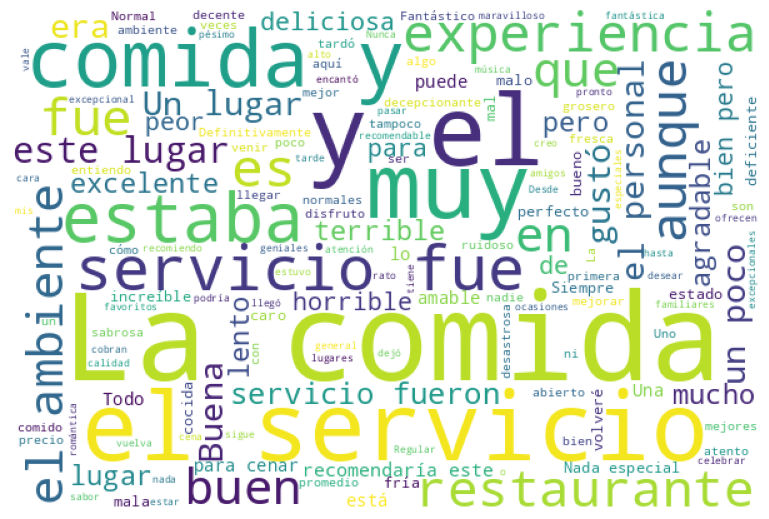

In [14]:
#!pip isntall wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Combinar todos los comentarios en una sola cadena
text = ' '.join(review for review in df.Comentario)

#Generar la nube de palabras
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

#Mostrar la nube de palabras
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#

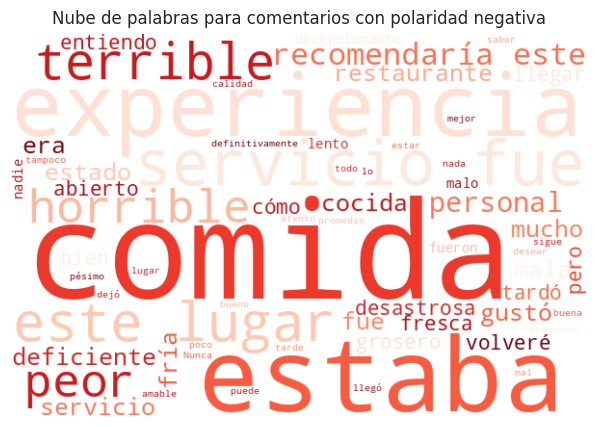

In [18]:
#Nube de palabras para los comentarios con polaridad negativa
negative_comments = " ".join(review for review in df1[df1['polaridad'] < 0].Comentario)
stopwords = set(STOPWORDS).union({"el", "la", "los", "las", "de", "y", "a", "que", "en", "por", "con", "es", "un", "una", "para", "muy"})
wordcloud = WordCloud(width=600, height=400, background_color='white',colormap='Reds', stopwords=stopwords).generate(negative_comments)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitamos los ejes
plt.title("Nube de palabras para comentarios con polaridad negativa")
plt.show()

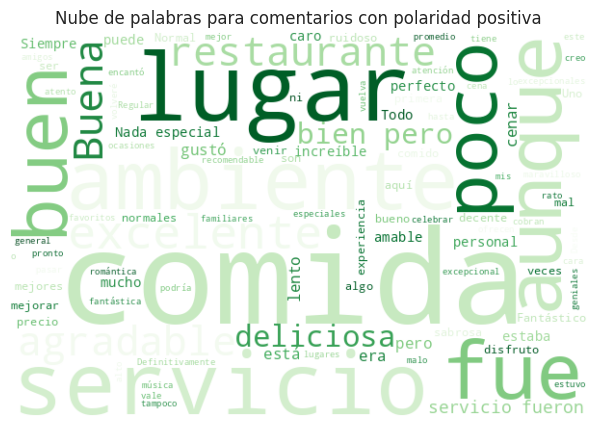

In [19]:
#Nube de palabras para los comentarios con polaridad positiva
positive_comments = " ".join(review for review in df1[df1['polaridad'] > 0].Comentario)
stopwords = set(STOPWORDS).union({"el", "la", "los", "las", "de", "y", "a", "que", "en", "por", "con", "es", "un", "una", "para", "muy"})
wordcloud = WordCloud(width=600, height=400, background_color='white',colormap='Greens', stopwords=stopwords).generate(positive_comments)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitamos los ejes
plt.title("Nube de palabras para comentarios con polaridad positiva")
plt.show()